### 5c: Replicate metrics-5 and show problem with un-normed y
This is seen in PvA plots at tails

In [1]:
import os, sys
import copy as copyroot
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from fastai2.basics import *
from fastai2.vision.all import *
%load_ext autoreload
%autoreload 2

from module.mnist_helpers import build_df, eda_fig_1, build_dls
from module.mnist_models import FeatsNet
from module.mnist_metrics import metrics_df

### Setup

In [3]:
path = untar_data(URLs.MNIST_TINY)
df = build_df(path)

dls_tl = build_dls(target='topleft')

In [4]:
fn = FeatsNet(feats=['pts12', 'pts22'])
learn = Learner(dls_tl, fn, loss_func=MSELossFlat(), y_range=(-1.,1.))
learn.fit(90,lr=2e-2)

epoch,train_loss,valid_loss,time
0,0.066161,0.024767,00:03
1,0.044357,0.022891,00:03
2,0.033090,0.011704,00:03
3,0.025844,0.005660,00:03
4,0.020387,0.005387,00:03
5,0.016702,0.006861,00:02
6,0.014144,0.003382,00:03
7,0.011980,0.003621,00:02
8,0.010332,0.003090,00:03
9,0.009027,0.003370,00:03


In [6]:
df = metrics_df(learn, 
           s_model="FeatsNet2.1122",
           s_details="feats=11,12 | epochs=90, lr=1e-2",
           s_target="topleft"
          )

In [7]:
df

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,FeatsNet2.1122,"feats=11,12 | epochs=90, lr=1e-2",topleft,valid,0.000735,0.020453,0.965819,0.031104,0.856025,0.001470,0.977005
1,FeatsNet2.1122,"feats=11,12 | epochs=90, lr=1e-2",topleft,train,0.000669,0.019642,0.972134,0.030337,0.871011,0.001337,0.982398


In [8]:
preds = learn.get_preds()

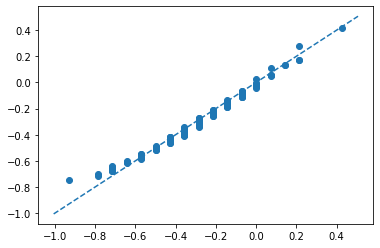

In [10]:
plt.scatter(preds[1].view(-1,2)[:,0], preds[0][:,0], )
tmp = torch.tensor((plt.xlim(), plt.ylim())).flatten()
lo, hi = tmp.min().item(), tmp.max().item()
plt.plot([lo,hi],[lo,hi], linestyle='--');

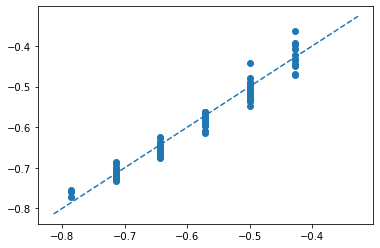

In [11]:
plt.scatter(preds[1].view(-1,2)[:,1], preds[0][:,1], )
tmp = torch.tensor((plt.xlim(), plt.ylim())).flatten()
lo, hi = tmp.min().item(), tmp.max().item()
plt.plot([lo,hi],[lo,hi], linestyle='--');

In [12]:
preds = learn.get_preds(with_loss=True)

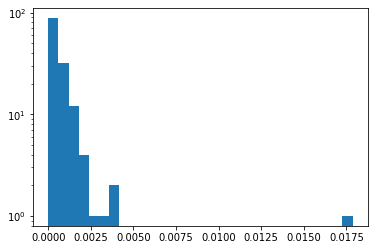

In [18]:
plt.hist(preds[2], bins=30, log=True );
# plt.xlim(0, .2)